# Neural Data Science with Python - Day 3 (Analog Signals and Biophysical Modeling)
* https://www.meetup.com/brain-and-consciousness/events/276875199/
![](images/meetupgroup.png)
* This notebook uses Python 3 (specifically, 3.9)

# Python examples from book: "Neural Data Science" by Erik Nylen and Pascal Wallisch
* https://www.amazon.com/gp/product/B06XCW39WX
* Datasets from book (and Jupyter notebooks for Python 2) at: https://www.elsevier.com/books-and-journals/book-companion/9780128040430/chapter-files#Chapter%20Files
![](images/BookCover.jpg)

# Additional resources
* Open-access neuroscience textbook: https://nba.uth.tmc.edu/neuroscience/s1/introduction.html
* Open-access 3-week computational neuroscience course: https://www.neuromatchacademy.org/syllabus

# Recommended reading (in addition to "Neural Data Sciece")
##### https://buzsakilab.com/wp/publications/
* Temporal coupling of field potentials and action potentials in the neocortex. BO Watson, M Ding, G Buzsáki.  http://buzsakilab.com/content/PDFs/Watson_etal_EurJournalofNeuroscience_2018.pdf
* What does gamma coherence tell us about inter-regional neural communication? György Buzsáki & Erik W Schomburg http://www.buzsakilab.com/content/PDFs/BuzsakiSchomburg2015.pdf 
* The origin of extracellular fields and currents — EEG, ECoG, LFP and spikes. György Buzsáki, Costas A. Anastassiou, and Christof Koch http://www.buzsakilab.com/content/PDFs/BuzsakiKoch2012.pdf
## Exercises from Chapter 5 (Analog Signals) and Chapter 6 (Biophysical Modeling)

# Theoretical background
Analog signals, characterized by smooth, continuous signals, are common in neuroscience. 
* Although action potentials are fast enough to be treated as digital signals (point processes with only possible values being 0 or 1), populations of neurons also produce signals in the extracellular space that are relatively smooth.
* Action potentials are typically in the frequency band over 1000 Hz. They are easy to ignore when looking at lower frequencies (meaningful population-level signals are typically under 200 Hz).

### Intracellular vs Extracellular recordings
* Intracellular recordings (patch-clamp) primarily contain action potentials, excitatory post-synaptic potentials (EPSPs), and inhibitory post-synaptic potentials (IPSPs) specific to the patched neuron.
* Extracellular recordings contain spikes from closest neurons, but also population-level signals.

### Analog neural recording methods
* Local Field Potentials (LFP; Collected from extracellular space)
* Electrocorticography (ECoG; Collected from surface of cerebral cortex - Often used in severe epilepsy patients to locate source of seizures. Basic researchers can use Virtual Reality experiments with these patients.)
* Electroencephalography (EEG; Collected from surface of scalp) 
* Magnetoencephalography (MEG; Magnetic counterpart of EEG)

## Sine & cosine waves have 3 parameters:
#### Frequency : Expressed in Hertz (periods per second)
#### Amplitude : Expressed in whatever unit was recorded. Electrical recordings have amplitude in Volts
* amplitude squared is proportional to power and energy

#### Phase (or phase-shift) : Expressed in degrees (360 degrees or 2*pi radians per period)

<Figure size 432x288 with 0 Axes>

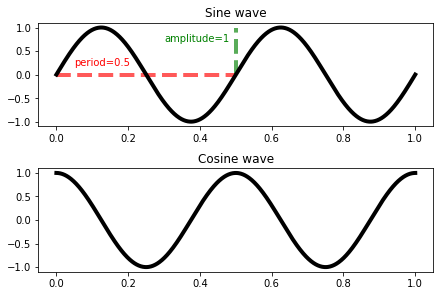

Cosine wave is equivalent to a sine wave shifted by 90 degrees (pi/2 radians)


In [54]:
# Synthesizing and plotting a pure sine wave.

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()                   # Open Figure
fs = 1000                            # Define sampling frequency, here 1000 Hz
dur = 1                              # Duration of time series, here 1 sec
t = np.linspace(0, dur, fs*dur)      # Define time base t in steps of sampling frequency
freq = 2                             # Define signal frequency, here 2 Hz
sinW = np.sin(2 * np.pi * freq * t)  # Sine wave
cosW = np.cos(2 * np.pi * freq * t)  # Cosine wave

fig, axes = plt.subplots(2,1, constrained_layout=True)
axes[0].plot(t, sinW, c='k', lw=4)        # Plot sine wave as black, thick line
axes[0].set_title('Sine wave')
axes[1].plot(t, cosW, c='k', lw=4)        # Plot cosine wave
axes[1].set_title('Cosine wave')

axes[0].hlines(0, 0, 0.5, color='red', linestyle='--', lw=4, alpha=0.65)
axes[0].annotate('period=0.5', [0.05, 0.2], color='red')
axes[0].vlines(0.5, 0, 1, color='g', linestyle='--', lw=4, alpha=0.65)
axes[0].annotate('amplitude=1', [0.3, 0.7], color='g')

plt.show()

print('Cosine wave is equivalent to a sine wave shifted by 90 degrees (pi/2 radians)')

# A sine or cosine wave is a 1-dimensional projection of a circle.

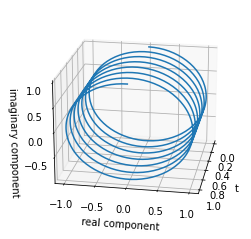

In [109]:
#from mpl_toolkits.mplot3d import Axes   # To plot in 3-dimensional space.
fig = plt.figure()
ax = fig.gca(projection='3d')

# j is Python's representation of imaginary number i
trace = np.exp(1j * 2 * np.pi * freq2 * t)   # exp(x) stands for e^(x)  

ax.set_xlabel('t')
ax.set_ylabel('real component')
ax.set_zlabel('imaginary component')
ax.view_init(20, 10)
ax.plot(t, np.real(trace), np.imag(trace), zdir='y')
plt.show()


# Interference patterns are usually additive combinations of sine waves.

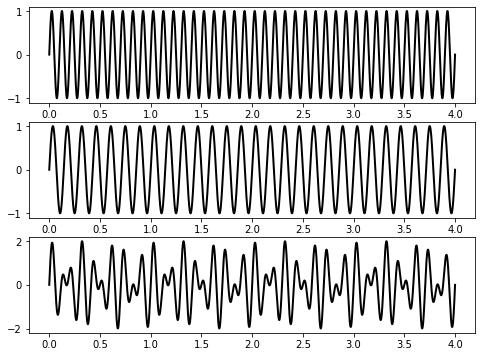

In [55]:
fig = plt.figure(figsize=[8, 6])                     # Open new figure
dur = 4                                # Duration = 4 seconds
t = np.linspace(0, dur, fs * dur)      # Define time base t
fs = 1000
freq = 10                              # Signal Frequency 10Hz
signal = np.sin(2 * np.pi * freq * t)  # Define first sine wave
ax = plt.subplot(3,1,1)                # Open a subplots with 3 panels
ax.plot(t, signal, c='k', lw=2)        # plot first sine wave

freq2 = 7
signal2 = np.sin(2 * np.pi * freq2 * t)   # 2nd signal is 7 Hz
ax = plt.subplot(3,1,2)   
ax.plot(t, signal2, c='k', lw=2)

ax = plt.subplot(3,1,3)
jointSignal = signal + signal2         # Final signal is an additive combination of the previous 2 signals
ax.plot(t, jointSignal, c='k', lw=2)     

plt.show()

## Fourier Transform:
#### Transforms time domain to frequency domain
![](images/Fourier%20Formula.png)
Transforms a time-domain function into a frequency-domain function.

Essentially, this is a dot product of time-domain function with a kernels in the frequency-domain.

Exponential term relates to sine and cosine through Euler's Formula:
![](images/Euler%20Formula.png)
![](images/visual%20rep%20of%20euler%20formula.png)

Within Fourier output: Real terms relate to amplitude. Imaginary terms relate to phase shifts. Imaginary terms are typically discarded for visualization, but they are necessary if you want to transform back to time-domain with the Inverse Fourier Transform.

Power can be calculated by multiplying the Fourier output by its complex conjugate, or equivalently, taking the absolute value of the Fourier output squared.
![](images/complex%20conjugate.png)

### Fast Fourier Transform (FFT) 
This algorithm exploits symmetry to greatly speed up computational time. This is fastest when the number of time points is a power of 2 (256, 512, 1024, 2048, ... , 2\**23). This improvement is most noticeable when time series has length over 2\**16.
* https://en.wikipedia.org/wiki/Fast_Fourier_transform
* https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/

c:\users\waltp\appdata\local\pypoetry\cache\virtualenvs\neuraldatascience-meetupseries-q80voz96-py3.9\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


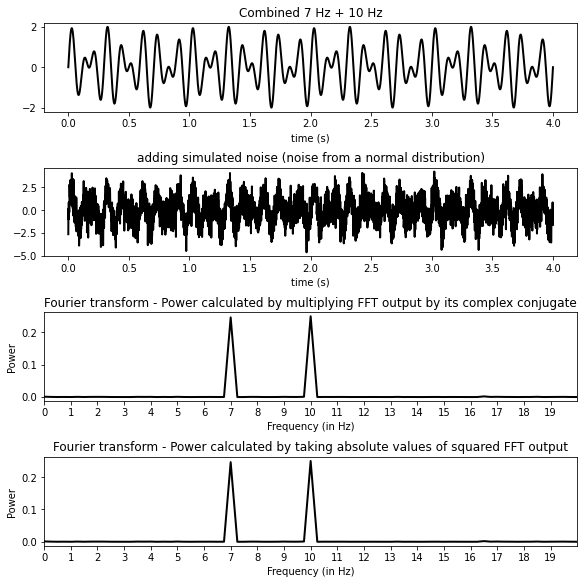

In [63]:
n = len(t)                            # Determine number of points in time base
noise = np.random.randn(n)            # Random noise drawn from a normal distribution
signalAndNoise = jointSignal + noise  # Add noise to signal

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4,1, figsize=[8, 8], constrained_layout=True)

ax0.plot(t, jointSignal, c='k', lw=2)
ax0.set_title('Combined 7 Hz + 10 Hz')
ax0.set_xlabel('time (s)')

ax1.plot(t, signalAndNoise, c='k', lw=2)
ax1.set_title('adding simulated noise (noise from a normal distribution)')
ax1.set_xlabel('time (s)')

# Now perform and plot Fourier transform

nyquist = fs/2                                     # Determine the Nyquist frequency (half the sampling rate)
fSpaceSignal = np.fft.fft(signalAndNoise)/len(t)   #Do the fast Fourier transform, normalized by time
fBase = np.linspace(0, nyquist, int(np.floor(len(signalAndNoise)/2)+1))    #Create a frequency base

halfTheSignal = fSpaceSignal[:len(fBase)] # Determine what half the signal is frequency space is
complexConjugate = np.conj(halfTheSignal) # Take the complex conjugate of that
powe = halfTheSignal*complexConjugate     # Calculate Power
ax2.plot(fBase,powe, c='k',lw=2)    # Plot power over the frequency base
ax2.set_xlim([0, 20]);              #9
ax2.set_xticks(range(20));#10
ax2.set_xlabel('Frequency (in Hz)') #11
ax2.set_ylabel('Power')

ax2.set_title('Fourier transform - Power calculated by multiplying FFT output by its complex conjugate')

ax3.plot(fBase, np.abs(halfTheSignal**2), c='k', lw=2)    # Plot power over the frequency base
ax3.set_xlim([0, 20]);              #9
ax3.set_xticks(range(20));#10
ax3.set_xlabel('Frequency (in Hz)') #11
ax3.set_ylabel('Power')

ax3.set_title('Fourier transform - Power calculated by taking absolute values of squared FFT output')

plt.show()

The Nyquist frequency (half the sampling rate) is the max frequency that can be resolved from a discrete time series.
If sampling rate is 1000 Hz, no latent signals faster than 500 Hz can be detected. 

Fourier transform output is symmetrical around the Nyquist frequency


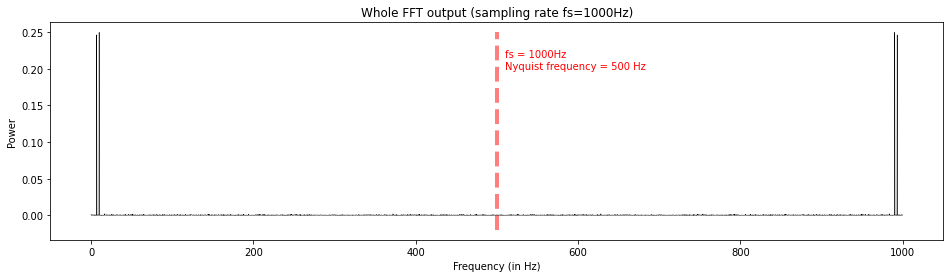

In [93]:

print('The Nyquist frequency (half the sampling rate) is the max frequency that can be resolved from a discrete time series.')

print('If sampling rate is 1000 Hz, no latent signals faster than 500 Hz can be detected. \n')

print('Fourier transform output is symmetrical around the Nyquist frequency')
fig = plt.figure(figsize=[16,4])
ax = plt.subplot(1,1,1)
fBase_full = np.linspace(0, nyquist*2, int(np.floor(len(signalAndNoise))))    #Full frequency base

ax.plot(fBase_full, np.abs(fSpaceSignal[:len(fBase_full)]**2), c='k', lw=0.5)    # Plot power over the frequency base
#ax.set_xlim([0, 20]);              #9
#ax.set_xticks(range(20));#10
ax.set_xlabel('Frequency (in Hz)') #11
ax.set_ylabel('Power')

ax.set_title('Whole FFT output (sampling rate fs=1000Hz)')
ax.vlines(500, -0.02, 0.25 , color='red', linestyle='--', lw=4, alpha=0.5)
ax.annotate('fs = 1000Hz \nNyquist frequency = 500 Hz', [510, 0.2], color='red')

plt.show()

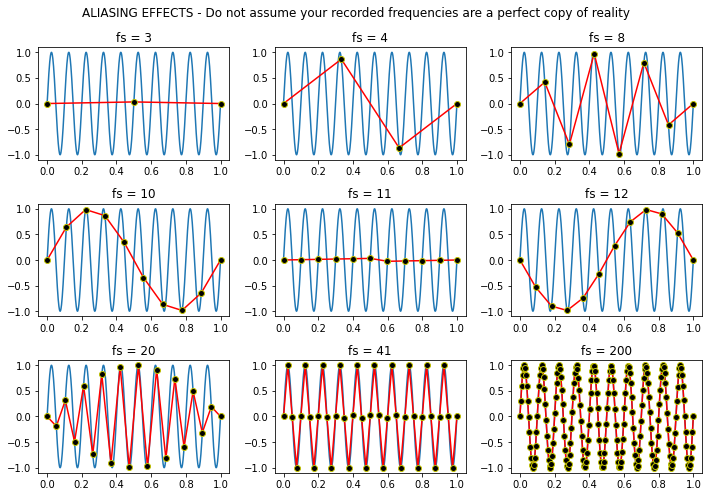

In [67]:
realSampling = 1000 #1
t = np.linspace(0,1,realSampling) #2
signalFrequency = 10 #3
samplingRate = [3, 4, 8, 10, 11, 12, 20, 41, 200] #4
signal = np.sin(2*np.pi*signalFrequency*t)#5
fig=plt.figure(figsize=[10,7]) #6
for ii,sampleRate in enumerate(samplingRate): #15
    ax = plt.subplot(3,3,ii+1)#7
    ax.plot(t,signal)#8
    sampledSignal = np.rint(np.linspace(0, len(t)-1, sampleRate)).astype(int)#10
    q = ax.plot(t[sampledSignal],signal[sampledSignal],c='r',marker='o',mfc='k',mec='y',
markersize=6); #11
    plt.title('fs = '+str(sampleRate)) #14
fig.suptitle('ALIASING EFFECTS - Do not assume your recorded frequencies are a perfect copy of reality')
plt.tight_layout()
plt.show()

## Side note on choice of sampling frequency and aliasing
* The frequencies we are interested in are latent variables. Your sampling frequency must be at least double the fastest frequency of interest.

# Frequency Filters
https://training.dewesoft.com/online/course/filters

Scipy:
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.boxcar.html#scipy.signal.windows.boxcar
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.kaiser.html#scipy.signal.windows.kaiser
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.hamming.html#scipy.signal.windows.hamming
* https://docs.scipy.org/doc/scipy/reference/signal.windows.html

<ipython-input-124-95379e4b4e2e>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(tt[1:], f[1:], np.log(Sxx[1:,1:]), cmap='hot')
<ipython-input-124-95379e4b4e2e>:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(tt[1:], f[1:], np.log(Sxx[1:,1:]), cmap='hot')


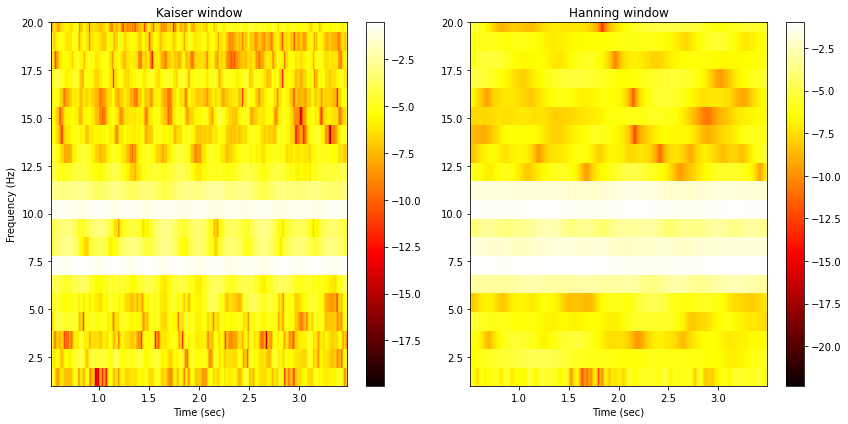

In [124]:
import scipy.signal as sg
windLength = 1024
wind = np.kaiser(windLength, 0)   # Create Kaiser window of length 1024
overl = len(wind) - 1     # Apply kernel with steps of 1. Huge overlap between subsequent segements.
yFreqs = range(21)        # Define frequencies we want in our spectrogram.

# Compute Spectrogram
f, tt, Sxx = sg.spectrogram(signalAndNoise, fs, wind, len(wind), overl)

fig = plt.figure(figsize=[12, 6])
plt.subplot(1,2,1)
plt.pcolormesh(tt[1:], f[1:], np.log(Sxx[1:,1:]), cmap='hot')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.ylim([1,20])
plt.title('Kaiser window')
plt.colorbar()

wind = np.hanning(windLength)   # Create Hanning window of length 1024
f, tt, Sxx = sg.spectrogram(signalAndNoise, fs, wind, len(wind), overl)   # Compute Spectrogram

plt.subplot(1,2,2)
plt.pcolormesh(tt[1:], f[1:], np.log(Sxx[1:,1:]), cmap='hot')
#plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.ylim([1,20])
plt.title('Hanning window')
plt.colorbar()

plt.tight_layout()
plt.show()

There is a tradeoff between clarity in time domain versus frequency domain.  In figures above, Kaiser window produces more clarity in time (x-axis), but Hanning window produces more clarity in frequency (y-axis) 

## In reality, spectrograms are used for changing signals, not static signals.
##### Chirps are a type of signal often observed in nature, for example, from colliding black holes making gravity waves

<ipython-input-133-7b67e57b8607>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(tt, f, Sxx)
<ipython-input-133-7b67e57b8607>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(tt, f, Sxx)
<ipython-input-133-7b67e57b8607>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nea

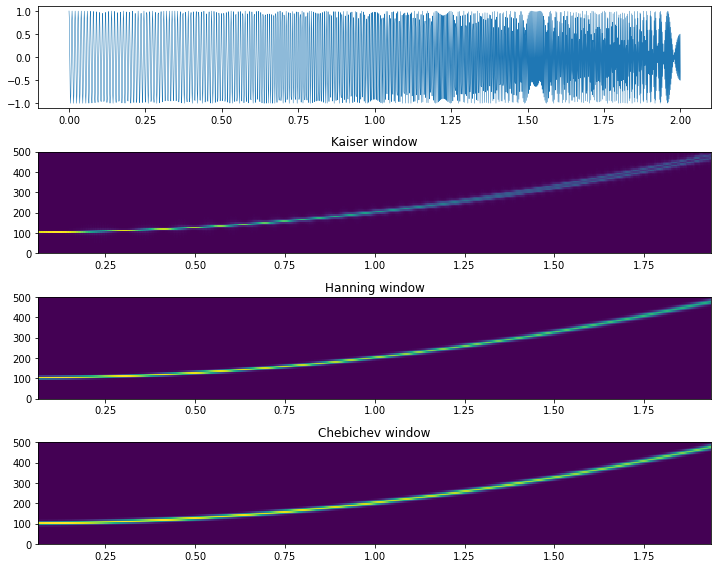

In [133]:
time = np.linspace(0, 2, fs*2)
y = sg.chirp(time, 100, 1, 200, 'quadratic')   # Synthesize chirp
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(4,1,1)
ax.plot(time, y, lw=0.5)

ax = plt.subplot(4,1,2)
windLength = 128   # Window length of 128 time points
overl = windLength - 1    # Max overlap (all except 1 point)
freqBins = 250    # We want 250 frequency bins on y-axis
wind = np.kaiser(windLength, 0)
f, tt, Sxx = sg.spectrogram(y, fs, wind, len(wind), overl)
plt.pcolormesh(tt, f, Sxx)
plt.title('Kaiser window')

ax = plt.subplot(4, 1, 3)
wind = np.hanning(windLength)
f, tt, Sxx = sg.spectrogram(y, fs, wind, len(wind), overl)
plt.pcolormesh(tt, f, Sxx)
plt.title('Hanning window')

ax = plt.subplot(4,1,4)
wind = sg.chebwin(windLength, at=100)
f, tt, Sxx = sg.spectrogram(y, fs, wind, len(wind), overl)
plt.pcolormesh(tt, f, Sxx)
plt.title('Chebichev window')

plt.tight_layout()
plt.show()

<ipython-input-134-63ebd4396c1b>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(tt, f, Sxx)
<ipython-input-134-63ebd4396c1b>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(tt, f, Sxx)
<ipython-input-134-63ebd4396c1b>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nea

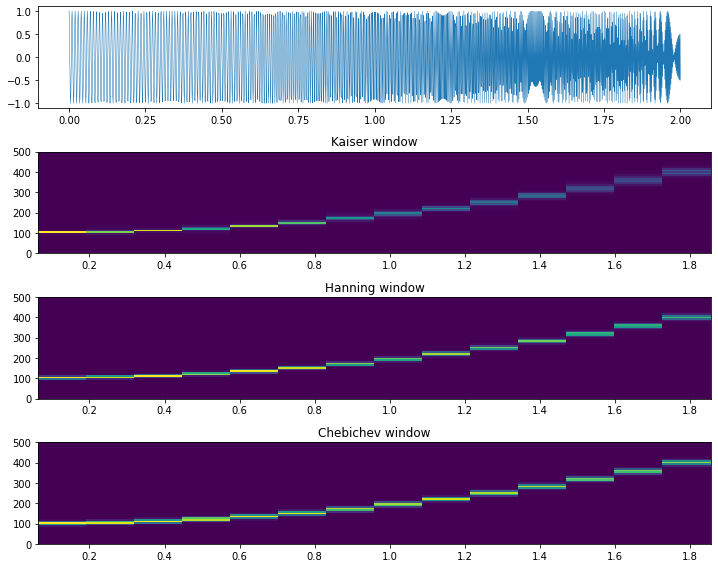

In [134]:
# Now with no overlap
time = np.linspace(0, 2, fs*2)
y = sg.chirp(time, 100, 1, 200, 'quadratic')   # Synthesize chirp
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(4,1,1)
ax.plot(time, y, lw=0.5)

ax = plt.subplot(4,1,2)
windLength = 128   # Window length of 128 time points
overl = 0    # Max overlap (all except 1 point)
freqBins = 250    # We want 250 frequency bins on y-axis
wind = np.kaiser(windLength, 0)
f, tt, Sxx = sg.spectrogram(y, fs, wind, len(wind), overl)
plt.pcolormesh(tt, f, Sxx)
plt.title('Kaiser window')

ax = plt.subplot(4, 1, 3)
wind = np.hanning(windLength)
f, tt, Sxx = sg.spectrogram(y, fs, wind, len(wind), overl)
plt.pcolormesh(tt, f, Sxx)
plt.title('Hanning window')

ax = plt.subplot(4,1,4)
wind = sg.chebwin(windLength, at=100)
f, tt, Sxx = sg.spectrogram(y, fs, wind, len(wind), overl)
plt.pcolormesh(tt, f, Sxx)
plt.title('Chebichev window')

plt.tight_layout()
plt.show()

# Butterworth filters

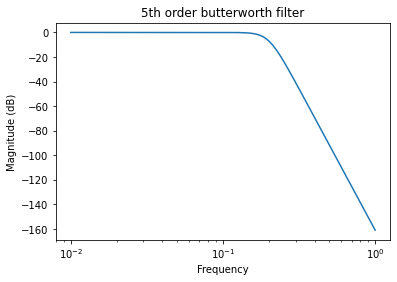

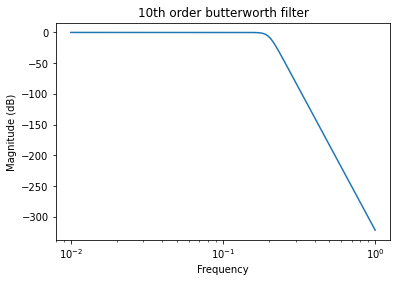

In [156]:
# lowpass filters
b1_low, a1_low = sg.butter(5, 0.2, 'low', analog=True)   # 5th order butterworth filter
b2_low, a2_low = sg.butter(10, 0.2, 'low', analog=True)   # 10th order butterworth filter

w, k = sg.freqs(b1_low, a1_low)
plt.semilogx(w, 20 * np.log(abs(k)))
plt.title('5th order butterworth filter')
plt.xlabel('Frequency')
plt.ylabel('Magnitude (dB)')
plt.show()

w, k = sg.freqs(b2_low, a2_low)
plt.semilogx(w, 20 * np.log(abs(k)))
plt.title('10th order butterworth filter')
plt.xlabel('Frequency')
plt.ylabel('Magnitude (dB)')
plt.show()

<ipython-input-173-8ceaa2a97a0e>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axes[ii, jj].pcolormesh(tt, f, Sxx)
<ipython-input-173-8ceaa2a97a0e>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axes[ii, jj].pcolormesh(tt, f, Sxx)
<ipython-input-173-8ceaa2a97a0e>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass sh

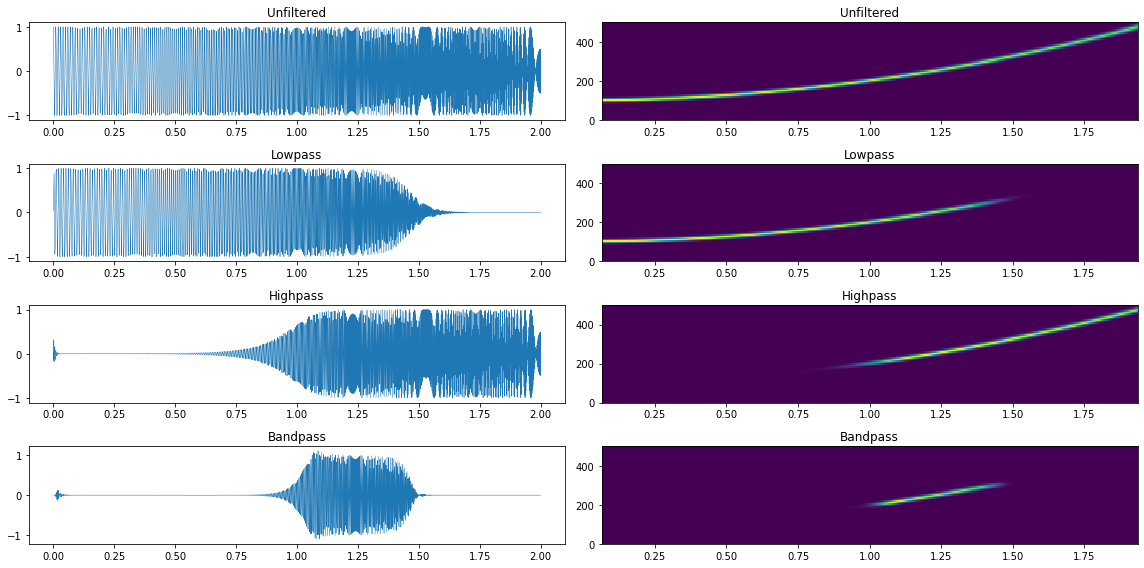

In [173]:
sos1 = sg.butter(8, 0.6, 'lowpass', output='sos')
sos2 = sg.butter(8, 0.4, 'highpass', output='sos')
sos3 = sg.butter(8, [0.4, 0.6], 'bandpass', output='sos')

winds = dict()
winds['y'] = y
winds['yLow'] = sg.sosfilt(sos1, y)
winds['yHigh'] = sg.sosfilt(sos2, y)
winds['yBand'] = sg.sosfilt(sos3, y)

fig, axes = plt.subplots(4, 2, figsize=(16,8))
overl = windLength - 1
signals = ['y', 'yLow', 'yHigh', 'yBand']

for ii in range(4):
    for jj in range(2):
        if jj % 2 == 0:
            axes[ii, jj].plot(time, winds[signals[ii]], lw=0.5)
            axes[ii, jj].set_title(['Unfiltered','Lowpass','Highpass','Bandpass'][ii])
        else:
            f, tt, Sxx = sg.spectrogram(winds[signals[ii]], fs, wind, len(wind), noverlap=overl)
            axes[ii, jj].pcolormesh(tt, f, Sxx)
            axes[ii, jj].set_title(['Unfiltered','Lowpass','Highpass','Bandpass'][ii])
plt.tight_layout()
plt.show()


## Chapter 6 - Biophysical Modeling
### Python cells from publisher's website: https://www.elsevier.com/books-and-journals/book-companion/9780128040430/chapter-files#Chapter%20Files

# Background

##### https://nba.uth.tmc.edu/neuroscience/s1/chapter01.html
### Resting potential is determined primarily by ionic concentrations of sodium (Na) and potassium (K) that are uneven between intracellular and extracellular space. Sodium is high concentration outside cells, while potassium is high concentration inside cells. Some baseline permeability exists in cell membrane. Resting membrane potential is determined by the Goldman-Hodgkin-Katz Equation (NOTE: P is permeability):
![](images/GoldmanHodgkinKatz_Equation.png)
### You can think of this like... sodium is a positive charge pushing inwards (excitatory), potassium is a positive charge pushing outwards (inhibitory), and chloride (not shown in this equation) is a negative charge pushing inward (inhibitory).
### Action potentials trigger the opening of voltage-gated ion channels, rapidly increasing the membrane permeability to sodium, leading to a rapid depolarization. This is followed by another phase of voltage-gated ion channels opening that increase permeability to potassium and chloride, causing re-polarization.
### Calcium is also a positive charge pushing inwards (excitatory), but its more important function is as a chemical signal. Calcium in the pre-synaptic terminal triggers neurotransmitter release. Calcium entering the post-synaptic side is tightly controlled, but when it does enter, it is a major contributor to synaptic plasticity.

### Molecular dynamics aside, there is a long history of studying neurons from a strictly electrical perspective. The common paradigm is to inject current and observe the response. Sometimes drugs are administered to block specific ion channels. A straightforward model of neuronal response to injected current can be modeled as:
![](images/Ch6%20formula.png)
* ### Where dV is the instantaneous change in voltage.
* ### gL is leak conductance (inverse of membrane resistance)
* ### V is membrane potential at present time
* ### vR is resting potential
* ### I is injected current
* ### C is membrane capacitance

### The last critical concept is the action potential threshold. This is the threshold at which voltage-gated sodium channels in the Axon Initial Segment begin to open, triggering a chain reaction that propagates down the axon to the axon terminal.
### Resting potentials and threshold potentials vary between neurons, but typical values might be -60mV to -80mV for resting potentials, and -40mV to -55mV for action potential thresholds.

In [175]:
import numpy as np # 1
import matplotlib.pyplot as plt
class Neuron(): # 2
    def __init__(self): #3
        self.C= .281     # Membrane capacitance.
        self.gL = .030   # Leak conductance.
        self.vR = -60.6     # Resting potential.
        self.vT = -50.4     # Action potential threshold.
    def create_injection_current(self): # 8
        self.currentInj =np.append(np.zeros(10),np.arange(100)/100.) # 9
        self.T = len(self.currentInj) # 10
    def leaky_integrate_and_fire(self): # 11
        self.timeseries = np.linspace(0,self.T-1,self.T) # 12
        self.V = np.ones(self.T)*self.vR # 13
        ii=0 # initial the index counter # 14
        while ii < self.T-2: # 15
            dV = (-self.gL*(self.V[ii] - self.vR)+self.currentInj[ii])/self.C # Equation from background
            self.V[ii+1]=self.V[ii]+dV                # Update voltage
            if self.V[ii+1]>=self.vT: # 18           # If action potential threshold is reached...
                self.V[ii+1]=20 # 19                 # Set to +20mV for one time point
                self.V[ii+2]=self.vR # 20            # Then reset to resting potential on following time point
                ii+=1 # increment 
            ii+=1 # Increment outside of the if statement # 22
    def plot_neuron(self): # 23
        fig = plt.figure() # 24
        ax = fig.add_subplot(211) # 25
        ax.plot(self.timeseries,self.currentInj,c='k') # 26
        ax.set_title('current injection',style='italic') # 27
        ax.set_ylabel('current (nA)',style='italic')
        ax2 = fig.add_subplot(212) # 29
        ax2.plot(self.timeseries,self.V,c='k') # 30
        ax2.set_title('integrate and fire voltage response',style='italic') # 31
        ax2.set_xlabel('time (ms)',style='italic') # 32
        ax2.set_ylabel('voltage (mV)',style='italic') # 33
        plt.tight_layout() # 34
        #plt.show() # 35
        plt.savefig('Integrate and fire voltage response.png')

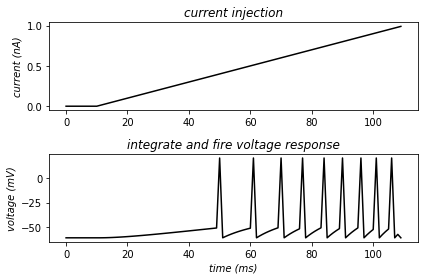

In [176]:
myFirstNeuron = Neuron() # 1
myFirstNeuron.create_injection_current() # 2
myFirstNeuron.leaky_integrate_and_fire() # 3
myFirstNeuron.plot_neuron() # 4

In [177]:
import numpy as np # 1
import matplotlib.pyplot as plt # 1
class Neuron2(): # 2
    def __init__(self): # 3
        self.C= .281 # 4
        self.gL = .030 # 5
        self.vR = -60.6 # 6
        self.vT = -50.4 # 7
    def create_injection_current(self,mag=1): # 8
        self.currentInj = np.arange(100)/100.*mag # 9
        self.T = len(self.currentInj) # 10
    def leaky_integrate_and_fire(self): # 11
        self.timeseries = np.linspace(0,self.T-1,self.T) # 12 
        self.V = np.ones(self.T)*self.vR # 13
        ii=0 # initial the index counter # 14 
        self.spikeCounter=0 # 15
        while ii < self.T-2: # 16
            dV = (-self.gL*(self.V[ii] -self.vR)+self.currentInj[ii])/self.C # 17
            self.V[ii+1]=self.V[ii]+dV # 18
            if self.V[ii+1]>self.vT: # 19
                self.V[ii+1]=20 # 20
                self.V[ii+2]=self.vR # 21
                ii+=1 # 22
                self.spikeCounter+=1 # 23
            ii+=1 # 24

In [178]:
def plotFI(currentMags,spikes): # 25
    fig=plt.figure() # 26
    ax = fig.add_subplot(111) # 27 
    ax.scatter(currentMags,spikes,c='k',edgecolor='w',s=50) # 28 
    ax.set_xlabel('current injection maximum (nA)',style='italic') #29
    ax.set_ylabel('number of spikes',style='italic') # 30 
    ax.set_title('Firing as function of current injected',style='italic') # 31
    #plt.show() # 32
    plt.savefig('Firing as function of current injected.png') #33

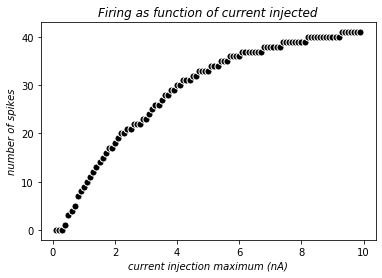

In [179]:
spikes=[] # 1
currentMags=np.arange(0.1,10,0.1) # 2 
for mag in currentMags: # 3
    mySecondNeuron = Neuron2() # 4
    mySecondNeuron.create_injection_current(mag) # 5
    mySecondNeuron.leaky_integrate_and_fire() # 6
    spikes.append(mySecondNeuron.spikeCounter) # 7
plotFI(currentMags,spikes) # 8

In [180]:
from scipy.optimize import leastsq # 1
def pevalEq(x,p): # 2
    return p[0] - p[2]*np.exp(-p[1]*x) # 3
def residualsEq(p,y,x): # 4
    err = (y - (p[0] - p[2]*np.exp(-p[1]*x))) # 5
    return err # 6
def eqFit(x,p0,y_meas): # 7
    plsq = leastsq(residualsEq,p0,args=(y_meas,x))#8
    return pevalEq(x, plsq[0]) # 9

Text(0, 0.5, 'RMSE')

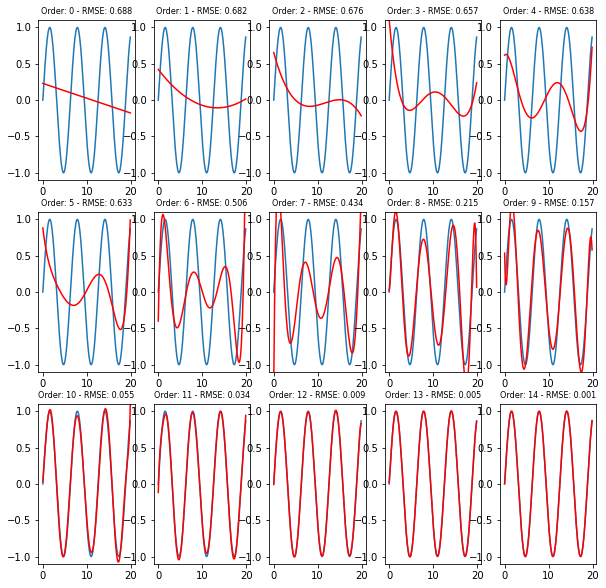

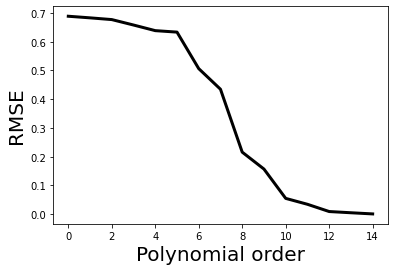

In [181]:
%matplotlib inline
x = np.arange(0,20,0.1)#1
y = np.sin(x) #2
highestOrder = 15 #3
RMSE = np.zeros(highestOrder)#4
f = plt.figure(figsize=(10,10)) #5
for nn in range(highestOrder):#17
    ax = plt.subplot(3,5,nn+1) #6
    p = np.polyfit(x,y,nn+1) #7
    y2 = np.zeros(len(x)) #8
    for ii in range(nn+2): #10
        y2 = y2 + p[ii]*x**(nn-ii+1) #9
    ax.plot(x,y) #11
    ax.plot(x,y2,c='r') #13
    ax.set_ylim([-1.1, 1.1]) #14
    RMSE[nn] = np.sqrt(np.mean((y-y2)**2)); #15
    ax.set_title('Order: '+ str(nn)+ ' - RMSE: '+
str(RMSE[nn])[:5],fontsize=8) #16
f=plt.figure()
plt.plot(range(highestOrder),RMSE,c='k',lw=3) #19
plt.xlabel('Polynomial order',fontsize=20) #20
plt.ylabel('RMSE',fontsize=20) #20

(0.0, 21.900000000000002)

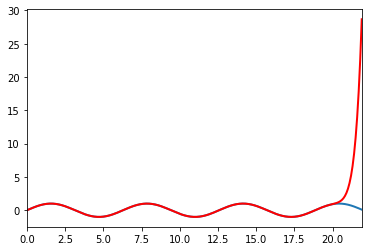

In [182]:
x = np.arange(0,22,.1) #1
y = np.sin(x) #2
y2 = np.zeros(len(x)) #8
for ii in range(nn+2): #10
    y2 = y2 + p[ii]*x**(nn-ii+1)
f=plt.figure() #4
plt.plot(x,y,lw=2) #5
plt.plot(x,y2,c='r',lw=2) #7
rmse = np.sqrt(np.mean((y-y2)**2)) #8
plt.xlim([min(x), max(x)]) #9

In [183]:
from scipy import stats
def rsquared(x,y): #1
    Slope,int_,r_val,p_val,std_err = stats.linregress(x,y)#2
    return r_val**2 # 3
def plotFit(x,y): # 4
    fig = plt.figure() # 5
    y_true = y # 6
    y_noise_added = y_true + np.random.randn(len(x)) #7
    p0 = [40,.4,40] # 8
    y_predict = eqFit(x,p0,y_noise_added) #9
    plt.plot(x, y_predict,c='b',lw=2) #10
    plt.scatter(x,y_true,c='k',s=2) #11
    plt.title('Least-squares fit to exponential') #12
    plt.legend(['Fit, r2 = '+ str(np.round(rsquared(y_predict, y_true),3)),'True'], loc='lower right') #13 
    plt.xlabel('current injected (nA)',style='italic') #14 
    plt.ylabel('spikes',style='italic')#15
plt.show() #16
#plt.savefig('Least squares fit to exponential.png') #17

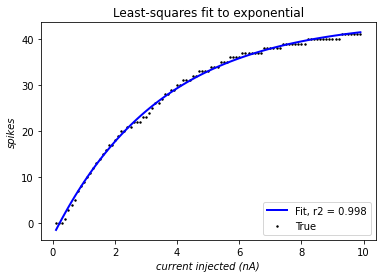

In [184]:
spikes=[] # 1
currentMags=np.arange(0.1,10,0.1) # 2
for mag in currentMags: # 3
    classInstance = Neuron2() #4
    classInstance.create_injection_current(mag) #5
    classInstance.leaky_integrate_and_fire() #6
    spikes.append(classInstance.spikeCounter) #7
plotFit(currentMags,spikes) #8

# Existing software and packages for neuronal modeling
### NEURON (good for single neurons or small local networks/circuits)
### CELL (for biochemical modeling)
### Brain Modeling ToolKit (BMTK) - Brand new. Very powerful.